# EDA and ETL

In [1]:
# Librerías generales
import pandas as pd   # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns # type: ignore
import warnings  

# Preprocesamiento de datos
from sklearn.preprocessing import StandardScaler, LabelEncoder  # type: ignore

# Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression  # type: ignore
from sklearn.ensemble import RandomForestClassifier  # type: ignore
from sklearn.neighbors import KNeighborsClassifier  # type: ignore
from xgboost import XGBClassifier  # type: ignore

# Métricas y evaluación de modelos
from sklearn.metrics import ( # type: ignore
    accuracy_score, classification_report, confusion_matrix, 
    precision_score, recall_score, f1_score 
)

# División de datos y optimización de hiperparámetros
from sklearn.model_selection import train_test_split, GridSearchCV  # type: ignore


In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Ver estructura general del dataset
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Filtrar las filas que contienen al menos un valor nulo
filas_con_nulos = train[train.isnull().any(axis=1)]

# Mostrar las filas con nulos
filas_con_nulos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [6]:
# Reemplazar nulos con la media de la edad y redondear hacia abajo
train['Age'] = train['Age'].fillna(train['Age'].median())

In [7]:
# Eliminar la columna 'Cabin' del dataset, porque tiene muchos nulos
train = train.drop(columns=['Cabin'])

# Eliminar la columna 'Name' del dataset
train = train.drop(columns=['Name'])

# Eliminar la columna 'Ticket' del dataset
train = train.drop(columns=['Ticket'])

# Eliminar la columna 'PassengerId' del dataset
train = train.drop(columns=['PassengerId'])

# Eliminar la columna 'Embarked' del dataset
# train = train.drop(columns=['Embarked'])

print(train)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female  28.0      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]


In [8]:
# Agrupamos por clase y calculamos el mínimo y máximo de Fare
fare_stats = train.groupby('Pclass')['Fare'].agg(['min', 'max', 'mean', 'median', 'count'])

# Mostramos los resultados
print(fare_stats)


        min       max       mean   median  count
Pclass                                          
1       0.0  512.3292  84.154687  60.2875    216
2       0.0   73.5000  20.662183  14.2500    184
3       0.0   69.5500  13.675550   8.0500    491


In [9]:
# Filtrar las filas que contienen al menos un valor nulo
filas_con_nulos = train[train.isnull().any(axis=1)]

# Mostrar las filas con nulos
filas_con_nulos

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38,0,0,80.0,NaN
829,1,1,female,62,0,0,80.0,NaN


In [10]:
# Dropear filas con Embarked nulo
train = train.dropna(subset=['Embarked'])

# Transformar Embarked a variables dummies (one-hot encoding)
train = pd.get_dummies(train, columns=['Embarked'], drop_first=False)  # drop_first para evitar multicolinealidad

# Verificamos que todo esté bien
print(train[['Embarked_Q', 'Embarked_S', 'Embarked_C']].head())

   Embarked_Q  Embarked_S  Embarked_C
0       False        True       False
1       False       False        True
2       False        True       False
3       False        True       False
4       False        True       False


In [17]:
# Asegurar que 'Sex' sea codificada correctamente
train = pd.get_dummies(train, columns=['Sex'], drop_first=True)

KeyError: "None of [Index(['Sex'], dtype='object')] are in the [columns]"

In [12]:
train = pd.get_dummies(train, columns=['Pclass'], drop_first=False)

In [14]:
train = train.drop(columns='AgeGroup')

In [18]:
cols_a_convertir = ['Embarked_C', 'Embarked_Q', 'Embarked_S', 
                    'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3']

train[cols_a_convertir] = train[cols_a_convertir].astype(int)


In [19]:
train.head()

,Survived,Age,SibSp,Parch,Fare,FareGroup,Embarked_C,Embarked_Q,Embarked_S,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,Low,0,0,1,1,0,0,1
1,1,38.0,1,0,71.2833,High,1,0,0,0,1,0,0
2,1,26.0,0,0,7.9250,Mid-Low,0,0,1,0,0,0,1
3,1,35.0,1,0,53.1000,High,0,0,1,0,1,0,0
4,0,35.0,0,0,8.0500,Mid-Low,0,0,1,1,0,0,1


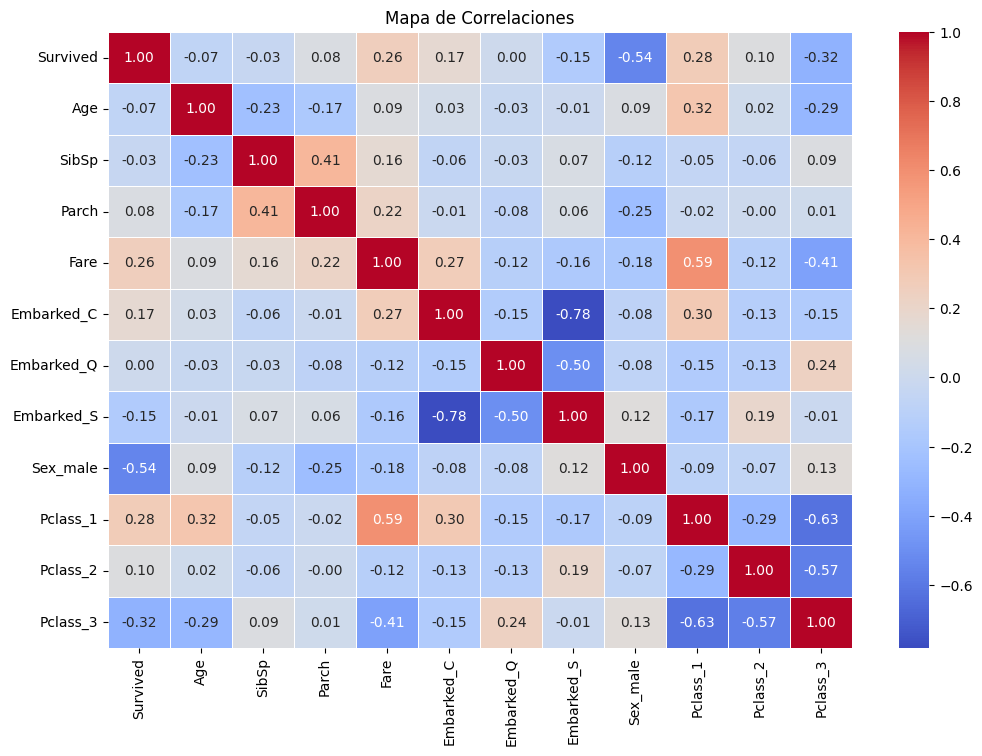

In [21]:
# Crear el mapa de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(train[['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male', 'Pclass_1','Pclass_2', 'Pclass_3']].corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Mostrar el gráfico
plt.title("Mapa de Correlaciones")
plt.show()

In [22]:
train.to_csv('train_processed.csv', index=False)